# [Ford GoBike System](https://s3.amazonaws.com/fordgobike-data/index.html) Data Analysis

<span style="color: gray; font-size:1em;">Vipin</span>
<br><span style="color: gray; font-size:1em;">August 2020</span>


## Table of Contents
- [Introduction](#intro)
- [Gathering Data](#gather)
- [Assessing Data](#assess)
- [Cleaning Data](#clean)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)

# <a id='intro'></a>
### Introduction

Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

### Preliminary Wrangling

This document explores the Ford GoBike's trip data for public containing approximately 239,111 bike rides of April 2019.

# <a id='gather'></a>
## Gathering Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import glob
import os

%matplotlib inline

In [2]:
# load the dataset
df = pd.read_csv(r'ford.csv')

<a id='assess'></a>
## Assessing  Data

In [3]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,NaN,NaN,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972.0,Male,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973.0,Male,No
5,1388,2019-04-30 23:53:05.9820,2019-05-01 00:16:14.3130,243.0,Bancroft Way at College Ave,37.869360,-122.254337,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3234,Customer,1997.0,Male,No
6,920,2019-04-30 23:57:56.3400,2019-05-01 00:13:16.4540,202.0,Washington St at 8th St,37.800754,-122.274894,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,3262,Subscriber,1976.0,Male,Yes
7,725,2019-04-30 23:56:11.2190,2019-05-01 00:08:16.9150,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,121.0,Mission Playground,37.759210,-122.421339,2706,Customer,1973.0,Male,No
8,488,2019-04-30 23:59:00.6600,2019-05-01 00:07:08.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,64.0,5th St at Brannan St,37.776754,-122.399018,860,Subscriber,1986.0,Male,No
9,792,2019-04-30 23:53:37.6040,2019-05-01 00:06:50.4050,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,126.0,Esprit Park,37.761634,-122.390648,896,Subscriber,1995.0,Male,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               239111 non-null int64
start_time                 239111 non-null object
end_time                   239111 non-null object
start_station_id           239047 non-null float64
start_station_name         239047 non-null object
start_station_latitude     239111 non-null float64
start_station_longitude    239111 non-null float64
end_station_id             239047 non-null float64
end_station_name           239047 non-null object
end_station_latitude       239111 non-null float64
end_station_longitude      239111 non-null float64
bike_id                    239111 non-null int64
user_type                  239111 non-null object
member_birth_year          227912 non-null float64
member_gender              227912 non-null object
bike_share_for_all_trip    239111 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 29.2+ MB


In [5]:
# View descriptive statistics of the dataframe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,239111.000000,239047.000000,239111.000000,239111.000000,239047.000000,239111.000000,239111.000000,239111.000000,227912.000000
mean,802.671199,141.836538,37.769536,-122.352503,140.838099,37.766996,-122.343420,3666.956493,1984.863250
std,1990.006091,116.289776,0.127698,0.277088,116.386168,0.343083,1.068144,2180.717333,9.953144
min,61.000000,3.000000,0.000000,-122.453704,3.000000,0.000000,-122.453704,11.000000,1878.000000
25%,349.000000,47.000000,37.770083,-122.413004,44.000000,37.770407,-122.411738,1720.000000,1980.000000
50%,558.000000,104.000000,37.780760,-122.398285,102.000000,37.780955,-122.397437,3471.000000,1987.000000
75%,876.000000,240.000000,37.797280,-122.291209,239.000000,37.797320,-122.291376,5749.000000,1992.000000
max,86114.000000,420.000000,37.880222,0.000000,420.000000,37.880222,0.000000,7108.000000,2001.000000


<a id='issues'></a>
**Quality issues**
 * we can calculate the age of the user
 * delete unwanted columns
 * delete rows with null values

<a id='clean'></a>
## Cleaning Data

In [6]:
# Create copies of original DataFrames
df_clean = df.copy()

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               239111 non-null int64
start_time                 239111 non-null object
end_time                   239111 non-null object
start_station_id           239047 non-null float64
start_station_name         239047 non-null object
start_station_latitude     239111 non-null float64
start_station_longitude    239111 non-null float64
end_station_id             239047 non-null float64
end_station_name           239047 non-null object
end_station_latitude       239111 non-null float64
end_station_longitude      239111 non-null float64
bike_id                    239111 non-null int64
user_type                  239111 non-null object
member_birth_year          227912 non-null float64
member_gender              227912 non-null object
bike_share_for_all_trip    239111 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 29.2+ MB


**Define**
<br>Calculate the age of the member

**Code**

In [8]:
# age calculation
df_clean['age'] = 2020-df_clean['member_birth_year']

In [9]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No,31.0
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,NaN,NaN,No,NaN
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No,27.0
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972.0,Male,No,48.0
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973.0,Male,No,47.0


**Define**
<br>drop the rows with null values

**Code**

In [10]:
df_clean = df_clean.dropna(how='any',axis=0) 

**Define**
<br>age column to integer

**Code**

In [11]:
df_clean["age"] =df_clean["age"].astype(int)

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227848 entries, 0 to 239110
Data columns (total 17 columns):
duration_sec               227848 non-null int64
start_time                 227848 non-null object
end_time                   227848 non-null object
start_station_id           227848 non-null float64
start_station_name         227848 non-null object
start_station_latitude     227848 non-null float64
start_station_longitude    227848 non-null float64
end_station_id             227848 non-null float64
end_station_name           227848 non-null object
end_station_latitude       227848 non-null float64
end_station_longitude      227848 non-null float64
bike_id                    227848 non-null int64
user_type                  227848 non-null object
member_birth_year          227848 non-null float64
member_gender              227848 non-null object
bike_share_for_all_trip    227848 non-null object
age                        227848 non-null int32
dtypes: float64(7), int32(1), int64

**Test**

In [13]:
df_clean.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No,31
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No,27
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972.0,Male,No,48
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973.0,Male,No,47
5,1388,2019-04-30 23:53:05.9820,2019-05-01 00:16:14.3130,243.0,Bancroft Way at College Ave,37.869360,-122.254337,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3234,Customer,1997.0,Male,No,23
6,920,2019-04-30 23:57:56.3400,2019-05-01 00:13:16.4540,202.0,Washington St at 8th St,37.800754,-122.274894,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,3262,Subscriber,1976.0,Male,Yes,44
7,725,2019-04-30 23:56:11.2190,2019-05-01 00:08:16.9150,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,121.0,Mission Playground,37.759210,-122.421339,2706,Customer,1973.0,Male,No,47
8,488,2019-04-30 23:59:00.6600,2019-05-01 00:07:08.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,64.0,5th St at Brannan St,37.776754,-122.399018,860,Subscriber,1986.0,Male,No,34
9,792,2019-04-30 23:53:37.6040,2019-05-01 00:06:50.4050,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,126.0,Esprit Park,37.761634,-122.390648,896,Subscriber,1995.0,Male,No,25
10,464,2019-04-30 23:56:44.3860,2019-05-01 00:04:28.9120,89.0,Division St at Potrero Ave,37.769218,-122.407646,97.0,14th St at Mission St,37.768265,-122.420110,3048,Subscriber,1984.0,Male,No,36


**Define**
<br>Drop unwanted columns

**Code**

In [35]:
df_clean=df_clean.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],axis=1)

KeyError: "['start_station_latitude' 'start_station_longitude' 'end_station_latitude'\n 'end_station_longitude'] not found in axis"

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227756 entries, 0 to 239110
Data columns (total 13 columns):
duration_sec               227756 non-null int64
start_time                 227756 non-null object
end_time                   227756 non-null object
start_station_id           227756 non-null float64
start_station_name         227756 non-null object
end_station_id             227756 non-null float64
end_station_name           227756 non-null object
bike_id                    227756 non-null int64
user_type                  227756 non-null object
member_birth_year          227756 non-null float64
member_gender              227756 non-null object
bike_share_for_all_trip    227756 non-null object
age                        227756 non-null int32
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 33.5+ MB


In [37]:
# save cleaned data 
df_clean.to_csv('clean_ford_data.csv', index=False)

### What is the structure of your dataset?

There are 223083 data trips for fordgobike in the dataset with 22  features (duration_sec, start_time, end_time,  end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Most variables are numerical,datetime.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out the relation of age with other attributes.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the age of the users have relations with trip duration,stations(intersted place) etc

<a id='univariate'></a>
## Univariate Exploration

we can start by looking bike rentals and distribution of weekdays and hours of the day. I will also explore the duration of the trips.

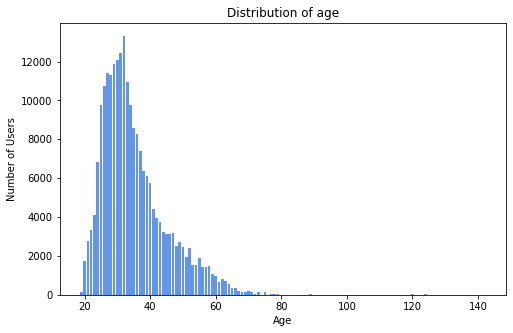

In [18]:
# plotting types of users 
plt.figure(figsize=[8,5])
plt.bar(x = df_clean.age.value_counts().keys(), height = df_clean.age.value_counts(),color='cornflowerblue' )
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

In [19]:
df_clean = df_clean.query('age <=100')

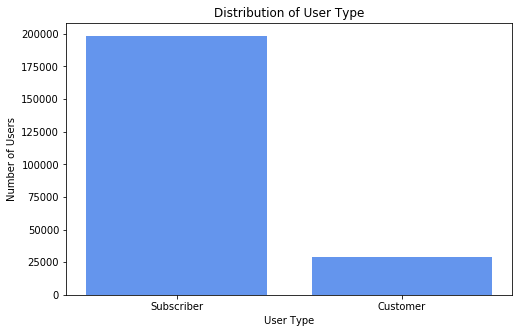

In [20]:
# plotting types of users 
plt.figure(figsize=[8,5])
plt.bar(x = df_clean.user_type.value_counts().keys(), height = df_clean.user_type.value_counts(),color='cornflowerblue' )
plt.title('Distribution of User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

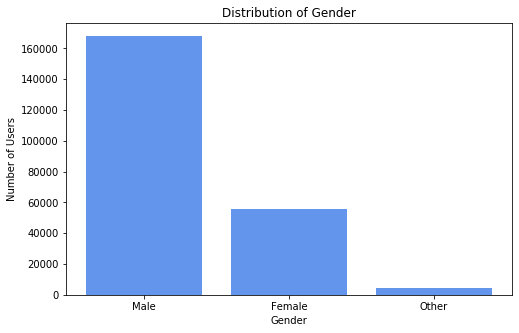

In [21]:
# plotting genders 
plt.figure(figsize=[8,5])
plt.bar(x = df_clean.member_gender.value_counts().keys(), height = df_clean.member_gender.value_counts(),color='cornflowerblue' )
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

The bike share system is mainly used by males

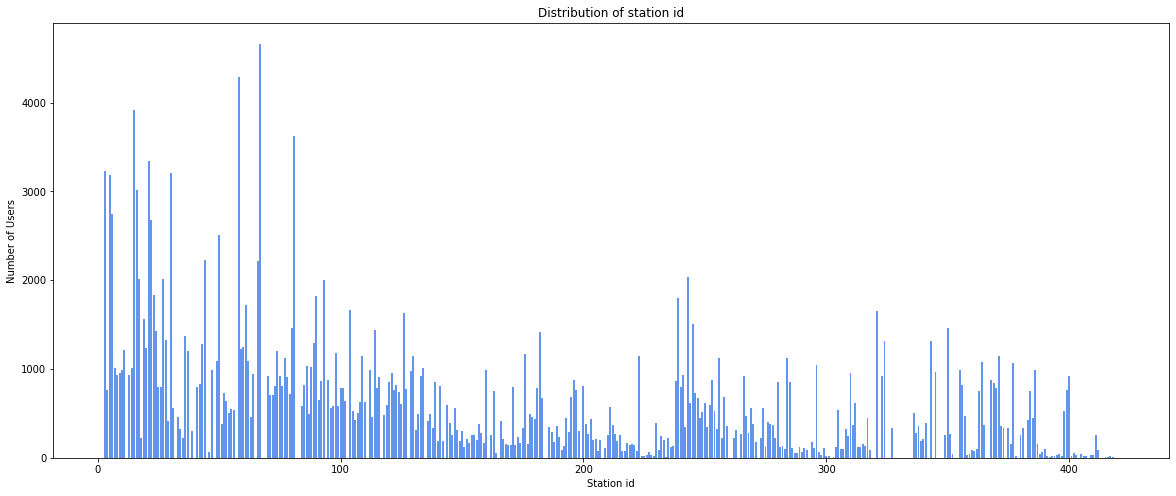

In [22]:
# plotting start stations 
plt.figure(figsize=[20,8])
plt.bar(x = df_clean.start_station_id.value_counts().keys(), height = df_clean.start_station_id.value_counts(),color='cornflowerblue' )
plt.title('Distribution of station id')
plt.xlabel('Station id')
plt.ylabel('Number of Users')
plt.show()

station id less than 100 have more entries than other stations in bay arena. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Nothing

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> From the age distribution graph we found that some entries have age more than 100 . so we deleted the rows with age greater than 100


<a id='bivariate'></a>
## Bivariate Exploration

In this section we can explore the dataset by adding the customer age to the analysis.

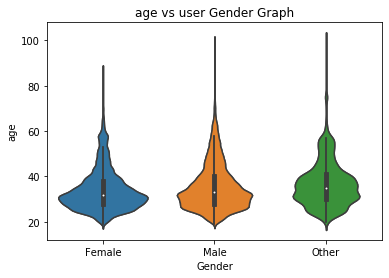

In [23]:


# Representing data using violin form

fig=sns.violinplot(x = 'member_gender', y = 'age', data = df_clean)
sns.violinplot(x='member_gender', y='age', data=df_clean)
plt.xlabel("Gender")
plt.ylabel("age")
plt.title("age vs user Gender Graph") 
plt.show(fig)

age distribution among the gender is almost same. most of the users are under the age of 40.
<br>
<br>Next, I am going to check whether there is any connection between age and user type

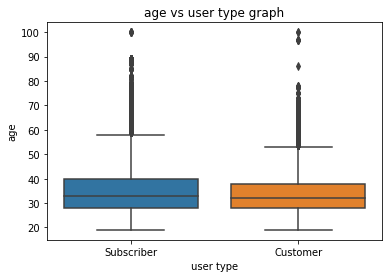

<Figure size 1440x360 with 0 Axes>

In [24]:
# Plotting the features using boxes

fig=sns.boxplot(x = 'user_type', y = 'age', data = df_clean)
plt.xlabel("user type")
plt.ylabel("age")
plt.title("age vs user type graph") 
plt.figure(figsize=(20,5))
plt.show(fig)

from the boxblot we can see that the service is mostly used by middle aged people. older people are more likely to fall into the subscriber category.

next we can check the trip duration between customers and Subscribers

(0, 104.986728796962)

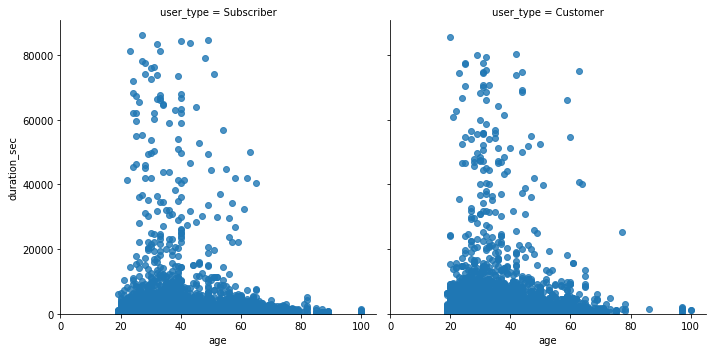

In [25]:

# Plot using duration vs age graph using seaborn
sns.lmplot(x='age', y='duration_sec', data=df_clean,
           fit_reg=False, 
           col='user_type')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)


 Most of the Subscribers are using our service for short duration and most of them are between 20-60 age category.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Adding the age to the analysis we found that most of the users are fall under the age of 30-40. There is no significant relation between age,usertype and gender. But we can see that 20-30 age group users taking longer rides than others.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> more aged users are fall under the group of customers also they are taking more longer trips than subscribers. To conclude subscribers are daily customers between the age of 20-40 using our service for short duration trips.

<a id='multivariate'></a>
## Multivariate Exploration

In this section I will further explore the dataset by adding gender,usertype,duration with age to explore more relations

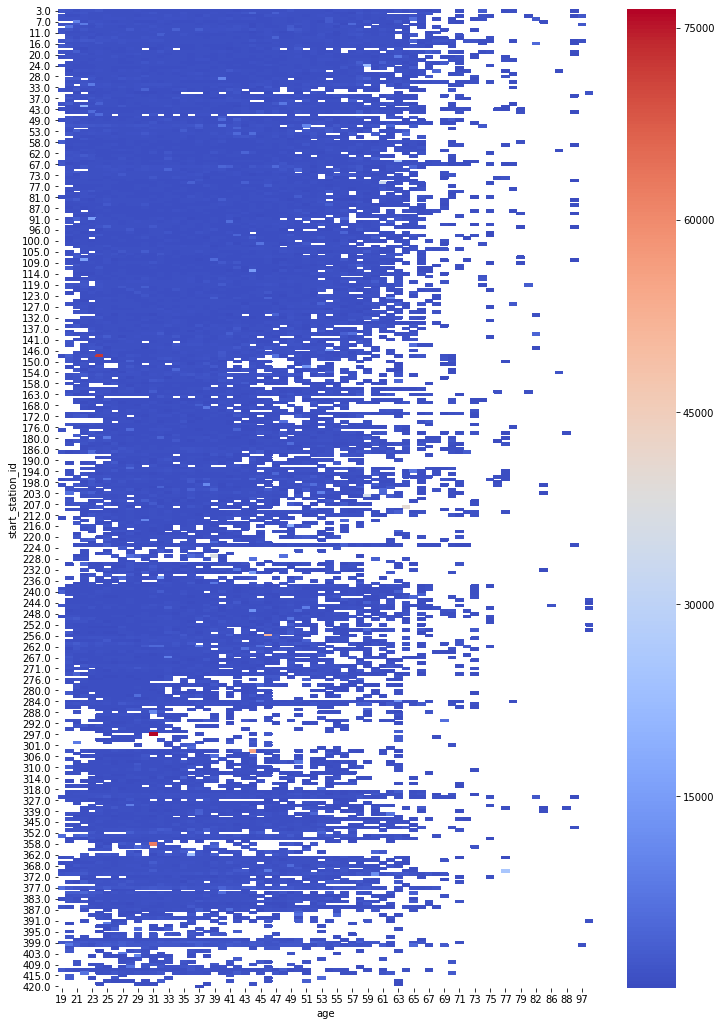

In [31]:
df3 = df_clean[['start_station_id','age', 'duration_sec']]
# pandas pivot with multiple variables
heatmap3_data = pd.pivot_table(df3,values='duration_sec', index=['start_station_id'], columns='age')
plt.figure(figsize=(12, 18))
sns.heatmap(heatmap3_data, cmap="coolwarm",fmt=".1f")

from the heatmap it is very clear that most of the people choose stations id less than 100 to start their trip.around 90 percentage of trip durations are less than 15000 sec.  

Now, we can check whether age have ralations with particular stations in more deatil.

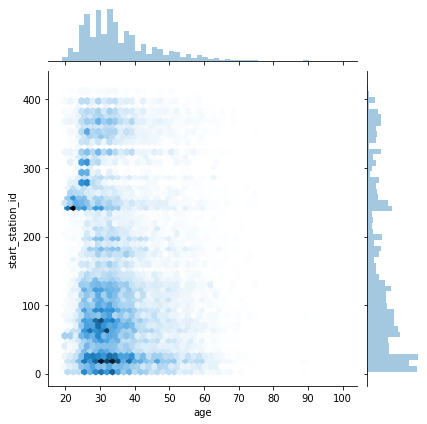

In [32]:
# Using multiple Histograms 
fig=sns.jointplot(x=df_clean.age, y=df_clean.start_station_id, kind="hex", data = df_clean)

plt.show(fig)

other than the first stations most of the stations same amount of customers with same age pattern except some stations id around 250.

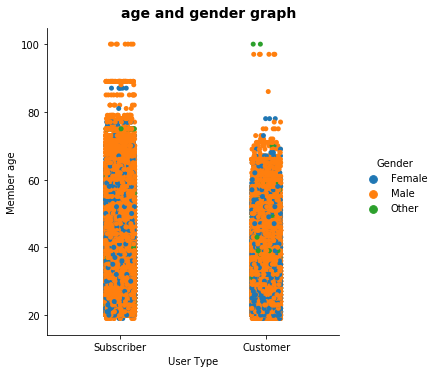

In [33]:
g = sns.catplot(data=df_clean, x='user_type', y="age", hue="member_gender")

g.set_axis_labels("User Type", "Member age")
g._legend.set_title('Gender')
g.fig.suptitle('age and gender graph', y=1.03, fontsize=14, fontweight='semibold');

There is surprising factor visible in this graph that some male users have around 100 years age in subscriber category and some males and other genders with above 95 years age are used this service, they are fall under the customers category.

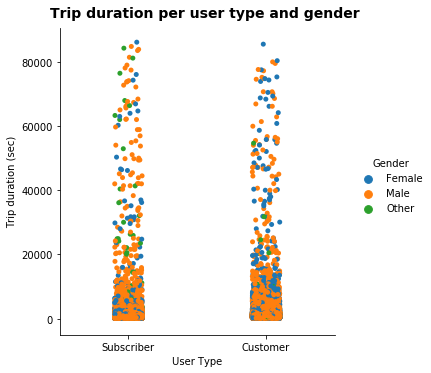

In [34]:
# code for the duration (sec) distribution per user type and gender

g = sns.catplot(data=df_clean, x='user_type', y="duration_sec", hue="member_gender")

g.set_axis_labels("User Type", "Trip duration (sec)")
g._legend.set_title('Gender')
g.fig.suptitle('Trip duration per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

Here it is very clear that in both cases females take longer trips than males and others.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Here we found that more aged users are fall under the subscriber category and subscribers are using this service almost for short trips. Most of the users renting bikes from station id less than 100 and the surprsing factor is more teenegers use a particular station id around 250.

### Were there any interesting or surprising interactions between features?

> From the age vs gender graph we found that some users with 100 years of age are using this services and they fall under the subscriber category